In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.signal import savgol_filter, find_peaks, lfilter
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from scipy.interpolate import interp1d
from scipy.io import loadmat 
import glob , os
import pywt




In [14]:
def build_12_lead_ecg(processed_signal, bad_leads,candidate_electrodes):
    """
    Constructs a 12-lead ECG signal from high-resolution electrode data.
    
    Parameters:
    - processed_signal: np.ndarray of shape (n_electrodes, n_samples)
        The raw or preprocessed signal from each electrode.
    - bad_leads: array-like of shape (n_electrodes,)
        Array indicating if a lead is bad (1 = bad, 0 = good).
    
    Returns:
    - ecg: np.ndarray of shape (12, n_samples)
        The computed 12-lead ECG signal in millivolts.
    """

    # Select electrode indices based on system resolution
    

    


    # Pick the first valid (non-bad) electrode from each candidate group
    selected_electrodes = []
    for group in candidate_electrodes:
        for electrode in group:
            # if bad_leads[electrode] == 0:
                selected_electrodes.append(electrode)
                break

    # Initialize 12-lead ECG signal array
    ecg = np.zeros((12, processed_signal.shape[1]))

    # Construct the limb leads (I, II, III)
    ecg[0, :] = processed_signal[selected_electrodes[1]] - processed_signal[selected_electrodes[0]]  # Lead I (LA - RA)
    ecg[1, :] = processed_signal[selected_electrodes[2]] - processed_signal[selected_electrodes[0]]  # Lead II (LL - RA)
    ecg[2, :] = processed_signal[selected_electrodes[2]] - processed_signal[selected_electrodes[1]]  # Lead III (LL - LA)

    # Construct the augmented leads (aVR, aVL, aVF)
    ecg[3, :] = -0.5 * (ecg[0, :] + ecg[1, :])  # aVR = - (I + II) / 2
    ecg[4, :] = -0.5 * (ecg[2, :] + ecg[0, :])  # aVL = - (III + I) / 2
    ecg[5, :] =  0.5 * (ecg[1, :] + ecg[2, :])  # aVF = (II + III) / 2

    # Add precordial leads V1 to V6
    for i in range(6):
        ecg[6 + i, :] = processed_signal[selected_electrodes[3 + i]]

    # Convert from microvolts to millivolts
    return ecg / 1000.



In [46]:

filename = r"C:\Users\emir.ege-nemutlu\Desktop\resp\Clinical\CHU1088\interpSig.csv"

df = pd.read_csv(filename, sep=',')


In [47]:
candidate_electrodes = [

    (16, 19),
    (88,),
    (120, 121, 122, 123),
    (48,),
    (72,),
    (76,),
    (98,),
    (101,),
    (112,),
]


In [48]:
sig = df.to_numpy()
output = build_12_lead_ecg(sig  , [],candidate_electrodes)


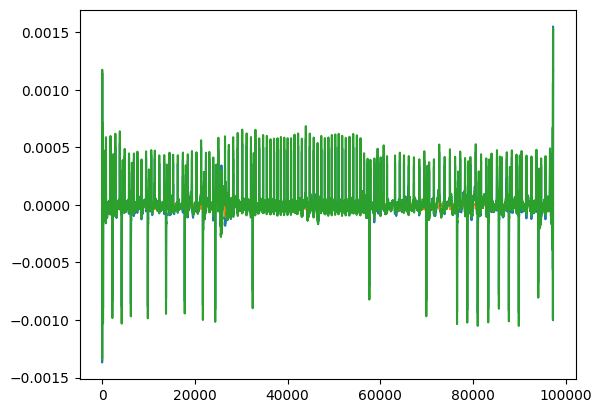

In [53]:
for i in range(3,6):
    plt.plot(output[i])
plt.show()


df = pd.DataFrame(output)

# df.to_csv("ECG1088.csv",             # filename
#           index=True,               # whether to write row labels
#           )  